In [1]:
import cv2
from PIL import Image
from imageai.Detection import ObjectDetection
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np

In [9]:
who = {
        0:'Catto',
        1:'Doggo'}


def captureFromCam():
    # camera capture object from cv2.VideoCapture class that takes ndex to camera port as arguement
    videoCam = cv2.VideoCapture(0)
    # when to save the image and stop video
    capture = False
    print('Press c to capture the image or e to exit...')
    # loop
    while(True):
        # capture the video frame by frame
        retangle, image = videoCam.read()
        image = cv2.flip(image, 1)
        # color negative
        #image = ~image
        # display the video
        cv2.imshow('Video', image)
        # capture image
        if cv2.waitKey(1) & 0xFF == ord('c'):
            print('Image saved!')
            # location
            file = "Undetected.png"
            # save the last captured frame/image
            cv2.imwrite(file, image)
            # stop capturing
            break
        # exit condition
        #if cv2.waitKey(1) & 0xFF == ord('e'):
        #    break
    # release the videoCam object when done
    videoCam.release()
    # delete the object
    del(videoCam)
    # destroy all windows
    cv2.destroyAllWindows()
    
def showImg():
    # open image in Windows image viewer
    #os.startfile('test_image.png')
    # another way to do the same
    #im = Image.open(r"test_image.png")  
    #im.show()
    BGR_img = cv2.imread('Undetected.png')
    # Matplot lib expects img in RGB format but OpenCV provides it in BGR
    RGB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_img)
    plt.title('The photo you took')
    plt.show()
    
def detectObjects():
    detector = ObjectDetection()

    model_path = "yolo-tiny.h5"
    input_path = "Undetected.png"
    output_path = "Detected.png"

    detector.setModelTypeAsTinyYOLOv3()
    detector.setModelPath(model_path)
    detector.loadModel()
    detection = detector.detectObjectsFromImage(input_image=input_path, output_image_path=output_path)

    for eachItem in detection:
        print(eachItem["name"] , " : ", eachItem["percentage_probability"])

def imagePreProcess():
    filenames = os.listdir("train")
    for file in filenames:
        im = Image.open("train/"+file)
        resizedImage = im.resize((128, 128))
        resizedImage.save("train/"+file)
    filenames = os.listdir("test1")
    for file in filenames:
        im = Image.open("test1/"+file)
        resizedImage = im.resize((128, 128))
        resizedImage.save("test1/"+file)

def resizeYourImage():
    im = Image.open("Undetected.png")
    resizedImage = im.resize((128, 128))
    resizedImage.save("Undetected.png")
    print('Resized!')

def predictWho():
    print("Calculating...")
    img = cv2.imread("Undetected.png",cv2.COLOR_BGR2RGB)
    test = np.array(img)
    X = np.array(test).reshape(-1,128,128,3)
    X = X/ 255.0
    new_model = tf.keras.models.load_model(r'C:\Users\geekSA67\code\Trained models\dogVScat_v2.model')
    predictions = new_model.predict(X)
    print('\033[1m'+ "It's a " + who[np.argmax(predictions)] + '\033[0m')
    
def whoInVideo():
    # Load the cascade
    face_cascade = cv2.CascadeClassifier('C:\\Users\\geekSA67\\AppData\\Local\\Programs\\Python\\Python38\\Lib\\site-packages\\~~2\\data\\haarcascade_frontalface_default.xml')

    # To capture video from webcam. 
    cap = cv2.VideoCapture(0)
    # To use a video file as input 
    #cap = cv2.VideoCapture('E:\\youtube\\uploads\\MrBeast 50M\\50M_Final.mp4')

    while True:
        # Read the frame
        rect, img = cap.read()
        img = cv2.flip(img, 1)
        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Detect the faces
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)
        # Draw the rectangle around each face
        i = 0;
        #resizedImage = img.resize((128, 128))
        #test = np.array(resizedImage)
        #X = np.array(test).reshape(-1,128,128,3)
        #X = X/ 255.0
        #new_model = tf.keras.models.load_model('dogVScat_v2.model')
        #predictions = new_model.predict(X)
        for (x, y, w, h) in faces:
            i=i+1
            cv2.rectangle(img, (x-20, y-20), (x+w+20, y+h+20), (255, 0, 0), 2)
            #cv2.putText(img, who[np.argmax(predictions)], (x, y), cv2.FONT_HERSHEY_PLAIN, 1.0, (0,255,0), 2)
            #cv2.putText(img, "id " + str(i), (x, y), cv2.FONT_HERSHEY_PLAIN, 1.0, (0,255,0), 2)
        # Display
        cv2.imshow('img', img)
        # Stop if escape key is pressed
        if cv2.waitKey(1) & 0xff == ord('e'):
            cv2.imwrite('Detected.png', img)
            img = cv2.imread('Detected.png')
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, 1.1, 4)
            i = 0;
            for (x, y, w, h) in faces:
                i=i+1
                cv2.rectangle(img, (x-20, y-20), (x+w+20, y+h+20), (255, 0, 0), 2)
                cv2.putText(img, "id " + str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,0,0), 0)
                cv2.imwrite('Detected.png', img)

            break
    # Release the VideoCapture object
    cap.release()
    del(cap)
    cv2.destroyAllWindows()

In [10]:
# This will change all train and test images to desired shape
#imagePreProcess()

Press c to capture the image or e to exit...
Image saved!


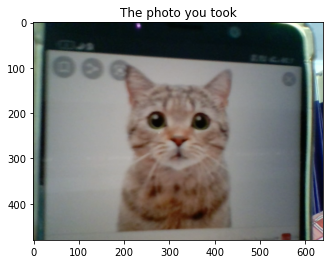

Resized!
Calculating...
It's a Catto


In [12]:
# capture image from webcam
captureFromCam()
# capture and save webcam image
showImg()

# dont do this
#detectObjects()

# resize the webcam image to desired shape
resizeYourImage()
# show new resized image
#showImg()

# predict cat or dog!
predictWho()

In [10]:
# shows a doggo or catto in a video
whoInVideo()